# Decision Tree for Classification

In [1]:
import pandas as pd

#decision tree for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#load datasets
data_db = pd.read_csv(r"C:\Users\AA\DataScience\datasets\diabetes.csv")
data_db.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
#feature selection
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X_features = data_db[feature_cols]
y_target = data_db['Outcome']

In [4]:
#splitting the data
X_features_train, X_features_test, y_target_train, y_target_test = train_test_split(X_features,y_target,test_size = 0.3,random_state =1)

In [5]:
#create the model
clasf = DecisionTreeClassifier()
clasf = clasf.fit(X_features_train,y_target_train)
y_pred = clasf.predict(X_features_test)
print(y_pred)

[0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


In [6]:
print(y_target_test)

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: Outcome, Length: 231, dtype: int64


In [7]:
print('Accuracy:',metrics.accuracy_score(y_target_test,y_pred))

Accuracy: 0.6926406926406926


In [8]:
#visualizing the tree
!pip install graphviz
!pip install pydotplus

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [10]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:

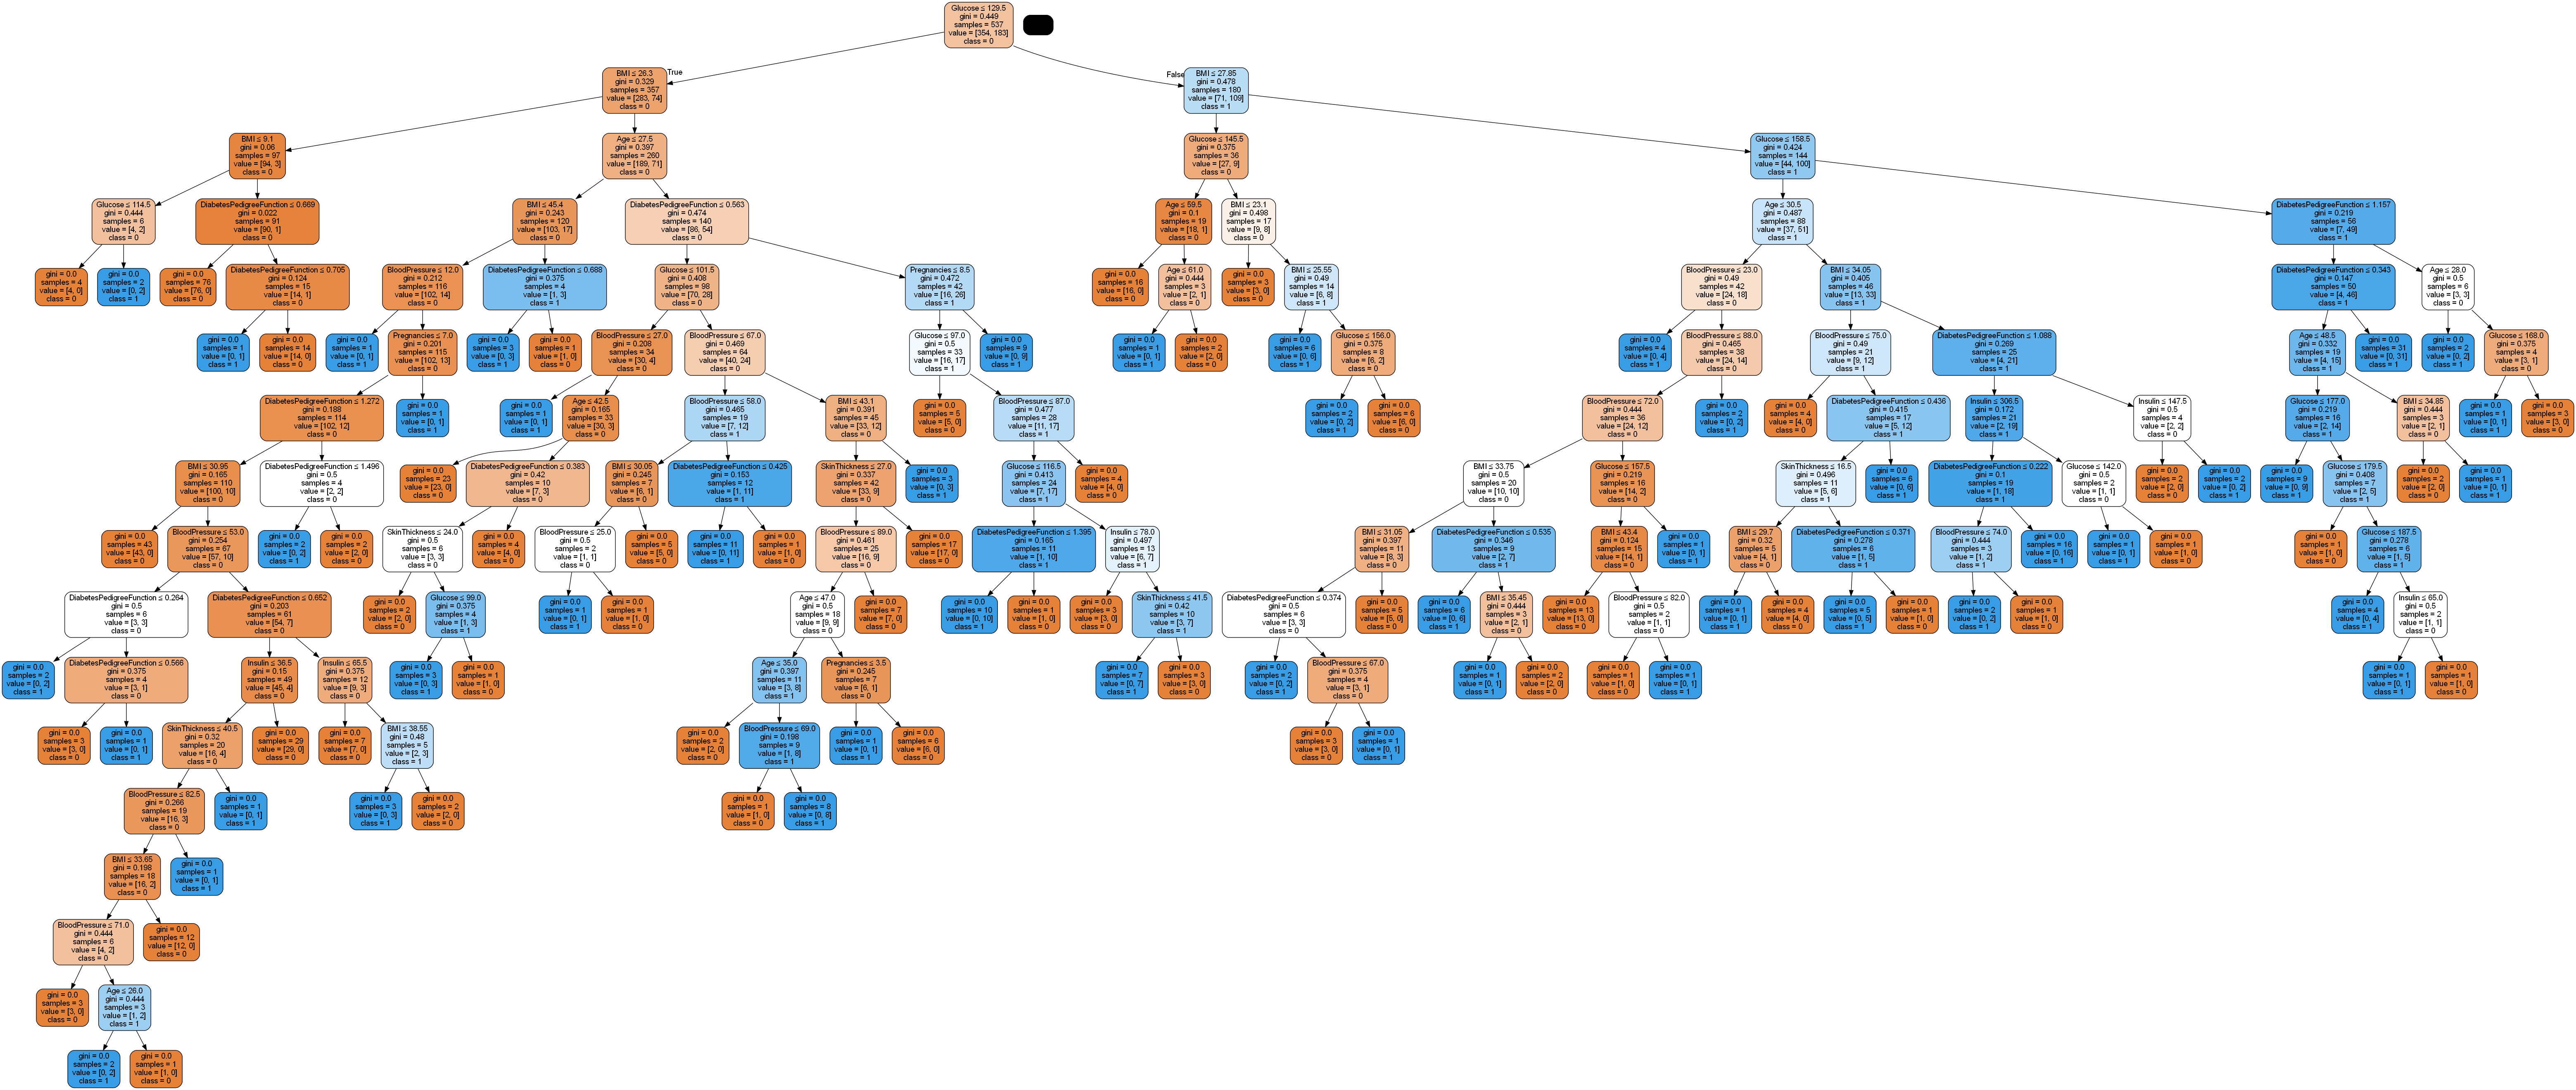

In [11]:
dot_data = StringIO()

export_graphviz(clasf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('diabetes.png')

Image(graph.create_png())

In [12]:
#optimising the tree
#'entropy' refers to the information gain, and the algorithm will try to maximize information gain when making splits.
#'gini', which refers to the Gini impurity.
#'best' means that the algorithm will consider all possible splits and choose the best one
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='best')
classifier = classifier.fit(X_features_train,y_target_train)
y_pred=classifier.predict(X_features_test)
print('Accuracy: ', metrics.accuracy_score(y_target_test,y_pred))

Accuracy:  0.7705627705627706


In [13]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [16]:
classifier.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\AA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [17]:
classifier.predict([[1,85,66,29,0,26.6,0.351,31]])

C:\Users\AA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Decision Tree For Regression

In [18]:
reg_df = pd.read_csv(r'C:\Users\AA\DataScience\datasets\DT-Regression-Data.csv')
reg_df


x           y
0     50.000000  157.493428
1     69.696970  156.420441
2     89.393939  158.189316
3    109.090909  160.136969
4    128.787879  156.819572
..          ...         ...
95  1921.212121  172.285091
96  1940.909091  176.001331
97  1960.606061  176.128171
98  1980.303030  175.813257
99  2000.000000  175.530826

[100 rows x 2 columns]

In [19]:
reg_df.head()

x           y
0   50.000000  157.493428
1   69.696970  156.420441
2   89.393939  158.189316
3  109.090909  160.136969
4  128.787879  156.819572

In [20]:
reg_df.isnull().sum()

x    0
y    0
dtype: int64

In [21]:
x=reg_df.x
y=reg_df.y
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [22]:
x

array([[  50.        ],
       [  69.6969697 ],
       [  89.39393939],
       [ 109.09090909],
       [ 128.78787879],
       [ 148.48484848],
       [ 168.18181818],
       [ 187.87878788],
       [ 207.57575758],
       [ 227.27272727],
       [ 246.96969697],
       [ 266.66666667],
       [ 286.36363636],
       [ 306.06060606],
       [ 325.75757576],
       [ 345.45454545],
       [ 365.15151515],
       [ 384.84848485],
       [ 404.54545455],
       [ 424.24242424],
       [ 443.93939394],
       [ 463.63636364],
       [ 483.33333333],
       [ 503.03030303],
       [ 522.72727273],
       [ 542.42424242],
       [ 562.12121212],
       [ 581.81818182],
       [ 601.51515152],
       [ 621.21212121],
       [ 640.90909091],
       [ 660.60606061],
       [ 680.3030303 ],
       [ 700.        ],
       [ 719.6969697 ],
       [ 739.39393939],
       [ 759.09090909],
       [ 778.78787879],
       [ 798.48484848],
       [ 818.18181818],
       [ 837.87878788],
       [ 857.575

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50,random_state=42)

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
regressor = DecisionTreeRegressor(criterion='absolute_error',splitter='best', max_depth=3)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

In [31]:
y_pred = regressor.predict(x_test)
y_pred

array([174.67535188, 167.05275038, 171.21757387, 164.50340905,
       164.50340905, 160.90272795, 160.90272795, 171.21757387,
       157.66306264, 157.66306264, 160.90272795, 160.90272795,
       171.21757387, 160.90272795, 174.67535188, 157.66306264,
       171.21757387, 171.21757387, 157.66306264, 160.90272795,
       167.05275038, 174.67535188, 160.90272795, 164.91849414,
       171.21757387, 157.66306264, 164.91849414, 175.81325722,
       157.66306264, 171.21757387, 157.66306264, 164.50340905,
       174.67535188, 160.90272795, 174.67535188, 157.66306264,
       171.21757387, 171.21757387, 160.90272795, 160.90272795,
       167.05275038, 160.90272795, 157.66306264, 174.67535188,
       160.90272795, 160.90272795, 174.67535188, 160.90272795,
       167.05275038, 157.66306264])

In [35]:
import numpy as np
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

1.9951184231368908